<a href="https://colab.research.google.com/github/feniltailor22/Deep_Learning/blob/main/ARIMA_Model_Time_Series_Forecasting_on_Car_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('/content/sales-cars.csv')

In [5]:
df.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [6]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [7]:
df.head()

,Month,Sales
0,2016-01-01,266
1,2016-02-01,146
2,2016-03-01,183
3,2016-04-01,119
4,2016-05-01,180


In [8]:
df.set_index('Month',inplace=True)

In [9]:
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [10]:
df.tail()

,Sales
Month,
2018-08-01,408
2018-09-01,490
2018-10-01,420
2018-11-01,520
2018-12-01,480


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


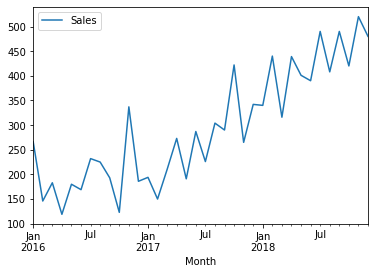

In [12]:
df.plot()

In [13]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
adf_test=adfuller(df['Sales'])

In [15]:
print(f'p-value: {adf_test[1]}')

p-value: 0.9979641164504948


For ADF Test:

The p-value is not less than the significance level (say 0.05) in order to reject the null hypothesis. 

Here p-value is >0.05 iferring that we failed to reject the Null Hypothesis.

Thereby, inferring that the series is non-stationary means it has some time dependency.


In [16]:
kpss_test=kpss(df['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


In [17]:
print(f'p-value: {kpss_test[1]}')

p-value: 0.0621776915426302


For KPSS Test:

The p-value is not less than the significance level (say 0.05) in order to reject the null hypothesis. 

Here p-value is >0.05 iferring that we failed to reject the Null Hypothesis.

Thereby, inferring that the series is stationary means it has no time dependency.


In [18]:
from statsmodels.graphics.tsaplots import plot_acf

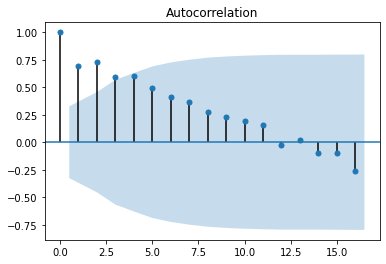

In [19]:
acf_plot= plot_acf(df)

Now, we came to case scenario that ADF Test indicates that Data is Non-stationary. Whereas, KPSS Test indicates that data is stationary.

Moreover, the AutoCorrelation Function plot also indicates that the data follows trend and seasonality. 

Hence, we can conclude that this data is trend stationary. 

We can detrend this data by applying differencing and by applying model fitting.

In [20]:
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [21]:
df.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [22]:
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model
df_diff= df.diff(periods=1)

In [23]:
df_diff = df_diff[1:]
df_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


In [24]:
# Testing For Stationarity

In [25]:
adf_test_diff= adfuller(df_diff['Sales'])

In [26]:
print(f'p-value: {adf_test_diff[1]}')

p-value: 0.590302628217058


In [27]:
kpss_test_diff= kpss(df_diff['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [28]:
print(f'p-value: {kpss_test_diff[1]}')

p-value: 0.1


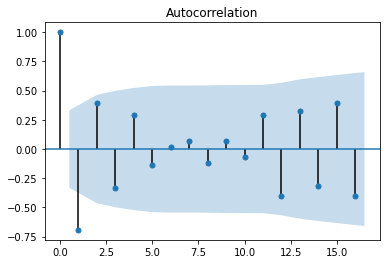

In [29]:
acf_plot_diff= plot_acf(df_diff)

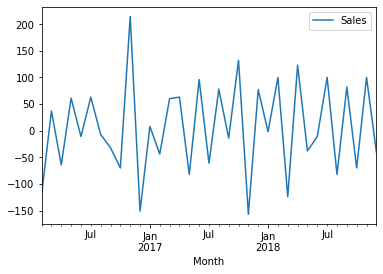

In [30]:
df_diff.plot()

In [31]:
df_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2016-02-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   35 non-null     float64
dtypes: float64(1)
memory usage: 560.0 bytes


In [32]:
df_train= df[:27] # 27 data as train data
df_test = df[26:]  # 9 data as test data

In [33]:
df_train

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180
2016-06-01,169
2016-07-01,232
2016-08-01,225
2016-09-01,193


In [34]:
df_train.size

27

In [35]:
df_test

,Sales
Month,
2018-03-01,316
2018-04-01,439
2018-05-01,401
2018-06-01,390
2018-07-01,490
2018-08-01,408
2018-09-01,490
2018-10-01,420
2018-11-01,520


In [36]:
df_test.size

10

**Autoreggresive AR Model**

In [37]:
from statsmodels.tsa.ar_model import AR

In [38]:
model_ar= AR(df_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [39]:
model_ar_fit= model_ar.fit()

In [40]:
df_test['pred_ar']= model_ar_fit.predict(start=26, end=35, dynamic= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_test

,Sales,pred_ar
Month,,
2018-03-01,316,348.464701
2018-04-01,439,392.133309
2018-05-01,401,377.952621
2018-06-01,390,433.349208
2018-07-01,490,404.456656
2018-08-01,408,437.282179
2018-09-01,490,413.262318
2018-10-01,420,441.616941
2018-11-01,520,435.481090


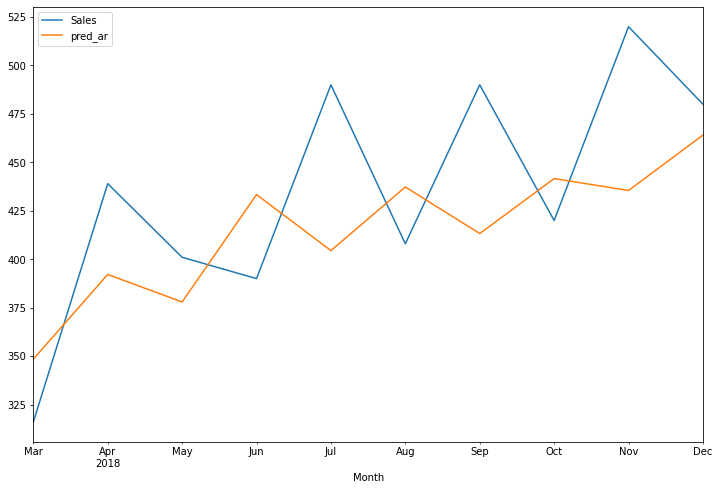

In [42]:
df_test[['Sales','pred_ar']].plot(figsize=(12,8))

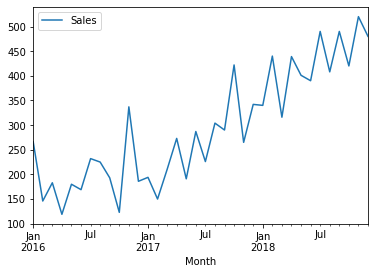

In [43]:
df.plot()

**ARIMA model**

Three values are given as an input to ARIMA model:

* p: AutoRegressive model lags 
* d: differencing (Integrated)
* q: Moving Average lags

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
model_arima= ARIMA(df_train, order=(3,1,0))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [46]:
model_arima_fit= model_arima.fit()

In [47]:
df_test['pred_arima']= model_arima_fit.forecast(steps=10)[0]
df_test['pred_arima']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Month
2018-03-01    393.124885
2018-04-01    367.084519
2018-05-01    432.191664
2018-06-01    370.181167
2018-07-01    424.077964
2018-08-01    400.333428
2018-09-01    444.767701
2018-10-01    412.541486
2018-11-01    450.359156
2018-12-01    434.283018
Name: pred_arima, dtype: float64

In [48]:
df_test

,Sales,pred_ar,pred_arima
Month,,,
2018-03-01,316,348.464701,393.124885
2018-04-01,439,392.133309,367.084519
2018-05-01,401,377.952621,432.191664
2018-06-01,390,433.349208,370.181167
2018-07-01,490,404.456656,424.077964
2018-08-01,408,437.282179,400.333428
2018-09-01,490,413.262318,444.767701
2018-10-01,420,441.616941,412.541486
2018-11-01,520,435.481090,450.359156


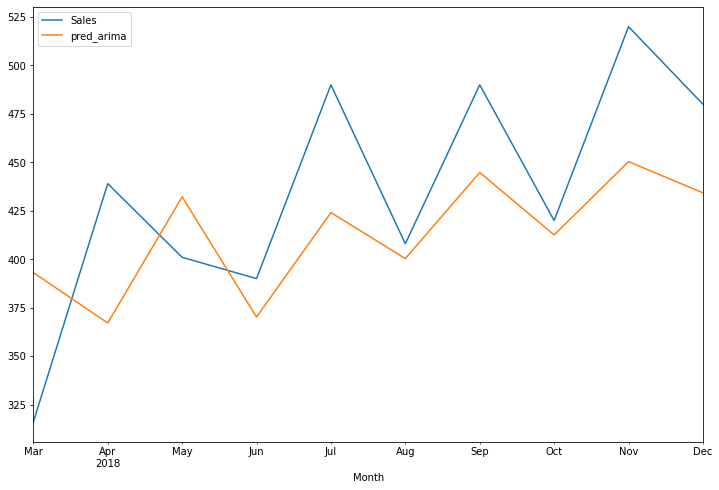

In [49]:
df_test[['Sales','pred_arima']].plot(figsize=(12,8))

In [50]:
print(model_arima_fit.aic)

294.8543584218622


In [51]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_test['Sales'],df_test['pred_arima'])

2593.1761505833992